In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, display_html
from tqdm import tqdm

In [3]:
import sys
sys.path.append("..")
from rllib.student import student
from rllib.dp import dp
from rllib.linear_solver import linear_solver
from rllib import misc

# define MDP

In [5]:
o = student()

# Solve v*(s)

In [7]:
hist = []
result_max = None
for i in tqdm(range(50_000)):
    a0, a1, a2, a3 = np.random.random(4)
    o.Π[0,o.A.index('study')] = a0
    o.Π[0,o.A.index('facebook')] = 1 - a0
    o.Π[1,o.A.index('study')] = a1
    o.Π[1,o.A.index('sleep')] = 1 - a1
    o.Π[2,o.A.index('pub')] = a2
    o.Π[2,o.A.index('study')] = 1 - a2
    o.Π[3,o.A.index('facebook')] = a3
    o.Π[3,o.A.index('quit')] = 1 - a3
    # run
    tmp = linear_solver.value_linear_solver(o, 1-0.1**10)
    if result_max is None:
        result_max = tmp
    else:
        result_max = np.maximum(result_max, np.array(tmp))
        hist.append(result_max.copy())

100%|████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 23439.35it/s]


# Plot

class1,class2,class3,fb,sleep
5.9,8.0,10.0,5.8,0.0


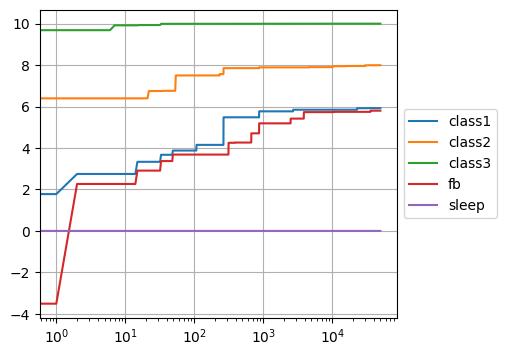

In [8]:
df = pd.DataFrame(hist, columns=['class1', 'class2', 'class3', 'fb', 'sleep'])
display(df[-1:].style.apply(misc.color_positive_green, mask=o.Π, axis=None)\
    .hide(axis='index').format(precision=1)\
    .set_caption('V*(s)'))

fig, ax = plt.subplots(1,figsize=(4.6, 4))
df.plot(grid=True, ax=ax)
ax.set_xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()